In [10]:
import numpy as np
import os 
import json
import glob
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix as sm

In [3]:
#### Reading the json files ####
pm_files =[]
path_to_json = '/Users/ketansand/Notebooks/Basecat/fitburst_runs/Second/scat_jsons'
#json_path = np.array(pm_files.append(glob.glob(path_to_file + '/results*.json')))
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
json_files = np.array(json_files)
print(json_files)

['results_fitburst_scat_36370989.json'
 'results_fitburst_scat_42800571.json'
 'results_fitburst_scat_42186702.json'
 'results_fitburst_scat_42295086.json'
 'results_fitburst_scat_40750224.json'
 'results_fitburst_scat_41119469.json'
 'results_fitburst_scat_41643446.json'
 'results_fitburst_scat_41358073.json'
 'results_fitburst_scat_41710598.json'
 'results_fitburst_scat_43054366.json'
 'results_fitburst_scat_42545361.json'
 'results_fitburst_scat_41366878.json'
 'results_fitburst_scat_41742525.json'
 'results_fitburst_scat_36154661.json'
 'results_fitburst_scat_42964441.json'
 'results_fitburst_scat_37637444.json'
 'results_fitburst_scat_37129627.json'
 'results_fitburst_scat_42637411.json'
 'results_fitburst_scat_41257959.json'
 'results_fitburst_scat_39240093.json'
 'results_fitburst_scat_41422618.json'
 'results_fitburst_scat_41872738.json'
 'results_fitburst_scat_43123299.json'
 'results_fitburst_scat_38547575.json'
 'results_fitburst_scat_41802046.json'
 'results_fitburst_scat_4

In [4]:
#### Reading data from json files ####

dms = []
scats = []
chis = []
dm_errs = []
sc_errs = []
widths = []
widths_err = []
events = []
snrs = []
for file in json_files:
    f = open(path_to_json+'/'+file)
    print(f)
    data = json.load(f)
    event= (file.split('.')[0]).split('_')[-1]
    events.append(event)
    fit_snr = data['fit_statistics']['snr']
    snrs.append(fit_snr)
    dm = data['initial_dm'] + data['fit_statistics']['bestfit_parameters']['dm'][0]
    dms.append(dm)
    scat = data['fit_statistics']['bestfit_parameters']['scattering_timescale'][0]
    scats.append(scat)
    chi_sq = data['fit_statistics']['chisq_final_reduced']
    chis.append(chi_sq)
    dm_err = data['fit_statistics']['bestfit_uncertainties']['dm'][0]
    dm_errs.append(dm_err)
    sc_err = data['fit_statistics']['bestfit_uncertainties']['scattering_timescale'][0]
    sc_errs.append(sc_err)
    width = np.array(data['fit_statistics']['bestfit_parameters']['burst_width'])#### Change needed here
    print(width, "\n")
    widths.append(width)
    width_err = np.array(data['fit_statistics']['bestfit_uncertainties']['burst_width'])### Change needed here ###
    widths_err.append(width_err)

<_io.TextIOWrapper name='/Users/ketansand/Notebooks/Basecat/fitburst_runs/Second/scat_jsons/results_fitburst_scat_36370989.json' mode='r' encoding='UTF-8'>
[7.80028520e-05 3.38234592e-05 2.76314127e-05 8.25177937e-05
 7.64020706e-05 1.17395976e-04 3.48961248e-04 1.96930646e-04] 

<_io.TextIOWrapper name='/Users/ketansand/Notebooks/Basecat/fitburst_runs/Second/scat_jsons/results_fitburst_scat_42800571.json' mode='r' encoding='UTF-8'>
[0.67149017] 

<_io.TextIOWrapper name='/Users/ketansand/Notebooks/Basecat/fitburst_runs/Second/scat_jsons/results_fitburst_scat_42186702.json' mode='r' encoding='UTF-8'>
[0.00096612] 

<_io.TextIOWrapper name='/Users/ketansand/Notebooks/Basecat/fitburst_runs/Second/scat_jsons/results_fitburst_scat_42295086.json' mode='r' encoding='UTF-8'>
[1.85743461e-05 3.15144019e-05 1.49731263e-05 6.68453387e-05] 

<_io.TextIOWrapper name='/Users/ketansand/Notebooks/Basecat/fitburst_runs/Second/scat_jsons/results_fitburst_scat_40750224.json' mode='r' encoding='UTF-8'>
[

In [16]:
#### Converting to arrays #####
dms = np.array(dms)
scats = np.array(scats)
dm_errs = np.array(dm_errs)
sc_errs = np.array(sc_errs)
widths = np.array(widths)
widths_err = np.array(widths_err)
chis = np.array(chis)
events = np.array(events)
snrs = np.array(snrs)

### Converting it to a dataframe ####

data = {
    'events': events,
    'dms': dms,
    'scats': scats,
    'widths': widths,
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

array([[<AxesSubplot:xlabel='dms', ylabel='dms'>,
        <AxesSubplot:xlabel='scats', ylabel='dms'>],
       [<AxesSubplot:xlabel='dms', ylabel='scats'>,
        <AxesSubplot:xlabel='scats', ylabel='scats'>]], dtype=object)

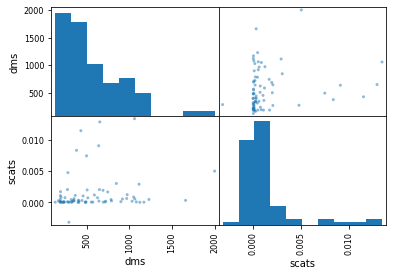

In [17]:
sm(df)

In [5]:
###### Removing negative and extremely large widths from fit results ####
### This is an issue with fitburst that has to be rectified #####

for i in range(len(events)):
    print(events[i])
    print(widths[i])
    ind_wr_w = np.where(widths[i] < 0)
    print(ind_wr_w)
    widths[i] = np.delete(widths[i], ind_wr_w[0])
    print(widths[i])
    ind_wr_w2 = np.where(widths[i] > 0.01)
    print(ind_wr_w2)
    widths[i] = np.delete(widths[i], ind_wr_w2[0])
    print(widths[i])
    print("\n")

29641002
[0.00016065 0.0006974  0.00677779 0.00448701]
(array([], dtype=int64),)
[0.00016065 0.0006974  0.00677779 0.00448701]
(array([], dtype=int64),)
[0.00016065 0.0006974  0.00677779 0.00448701]


41252817
[2.26813378e-05]
(array([], dtype=int64),)
[2.26813378e-05]
(array([], dtype=int64),)
[2.26813378e-05]


40594289
[2.07998707e-04 2.45997385e-04 4.40465934e-04 1.35975888e-03
 6.99250492e-05 6.45845307e-04]
(array([], dtype=int64),)
[2.07998707e-04 2.45997385e-04 4.40465934e-04 1.35975888e-03
 6.99250492e-05 6.45845307e-04]
(array([], dtype=int64),)
[2.07998707e-04 2.45997385e-04 4.40465934e-04 1.35975888e-03
 6.99250492e-05 6.45845307e-04]


32158184
[3.92150206e-04 3.01132066e-04 2.02776827e+00]
(array([], dtype=int64),)
[3.92150206e-04 3.01132066e-04 2.02776827e+00]
(array([2]),)
[0.00039215 0.00030113]


34024464
[0.0013672]
(array([], dtype=int64),)
[0.0013672]
(array([], dtype=int64),)
[0.0013672]


24342210
[0.00027156]
(array([], dtype=int64),)
[0.00027156]
(array([], dty

In [19]:
##### Removing bad fits ####
for i in range(len(snrs)):
    print(events[i], snrs[i])
ind_bad_fit = np.where(snrs < 30)
print(len(ind_bad_fit[0]))

dms = np.delete(dms, ind_bad_fit[0])
scats = np.delete(scats, ind_bad_fit[0])
dm_errs = np.delete(dm_errs, ind_bad_fit[0])
sc_errs = np.delete(sc_errs, ind_bad_fit[0])
widths = np.delete(widths, ind_bad_fit[0])
widths_err = np.delete(widths_err, ind_bad_fit[0])

29641002 69.4746451957351
41252817 26.654887029804023
40594289 79.82615171917772
32158184 72.5992219965984
34024464 32.179974071597506
24342210 14.327140981142259
26690059 38.187757099326554
42630260 91.80729575506781
38536189 93.99763707498879
40750656 40.3534200067714
38552211 43.78109353361429
41965143 29.40189187696586
27687783 277.0080255578723
32407381 87.59838866684336
24512726 54.570445999621974
23463808 128.92780565581808
39218186 49.62919441624672
23232723 67.95989583122105
31641122 66.16575933140392
37253504 37.436516664032645
41006263 45.26147209130624
34114954 122.76071270532277
24644651 51.44813378682067
25660576 119.94586699696684
41208961 67.62688560350995
36427698 79.10062246792509
39095517 70.56120871351757
25677682 35.516379070153285
41189480 26.928107218811643
39189271 10.268458726033401
42809769 31.46737909643239
33928716 66.28463124120894
37948191 78.98889939412737
42095127 19.308060683030483
35579228 59.21906998496559
33769804 103.93073425698435
38588698 79.22877

26
(75,)


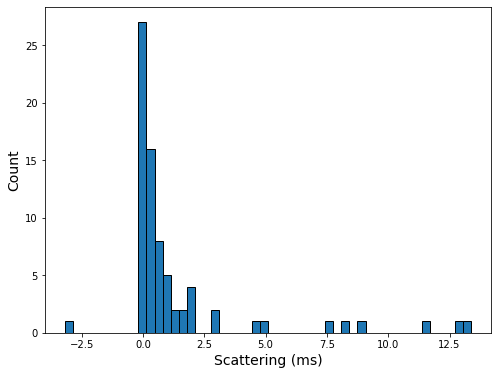

In [7]:
##### Scattering distribution ####

low_scat = np.where(scats < 0.0001)

print(len(low_scat[0]))

print(scats.shape)
plt.figure(figsize = (8,6))
plt.hist(scats*1e3, bins=50, histtype='bar', linewidth=1, edgecolor='k')
plt.xlabel("Scattering (ms)", fontsize=14)
plt.ylabel("Count", fontsize = 14)
plt.show()

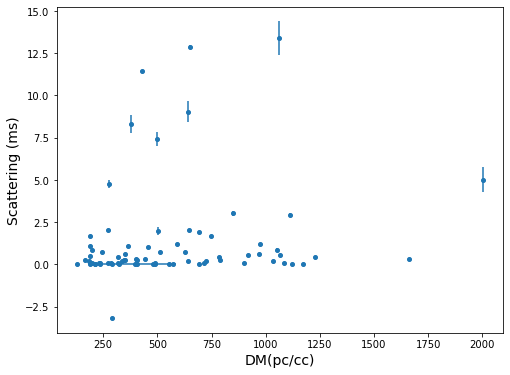

In [8]:
plt.figure(figsize = (8,6))
plt.errorbar(dms, scats*1e3, xerr = dm_errs, yerr=sc_errs*1e3, linestyle=' ', markersize=4, marker='o')
plt.ylabel("Scattering (ms)", fontsize=14)
plt.xlabel("DM(pc/cc)", fontsize = 14)
plt.show()

(138,)
[array([0.00016065, 0.0006974 , 0.00677779, 0.00448701])
 array([2.26813378e-05])
 array([2.07998707e-04, 2.45997385e-04, 4.40465934e-04, 1.35975888e-03,
        6.99250492e-05, 6.45845307e-04])
 array([0.00039215, 0.00030113]) array([0.0013672]) array([0.00027156])
 array([0.00043097, 0.0003142 , 0.00052507]) array([0.00036329])
 array([6.90423034e-05, 1.26108591e-04])
 array([0.00491895, 0.00104936, 0.0014604 ])
 array([0.00115547, 0.00966288, 0.0002164 ]) array([7.20658395e-05])
 array([0.00051397, 0.00040701, 0.00014389, 0.00044564, 0.0003095 ,
        0.00031559])
 array([6.17797574e-05, 1.63775691e-03, 1.97399511e-04, 2.38362207e-03,
        2.64157382e-03])
 array([8.15542031e-05, 2.69327172e-04, 1.67928820e-03, 2.73671329e-03])
 array([0.00020088, 0.00236346]) array([0.00136911, 0.00110976])
 array([8.63553344e-05, 1.00314916e-03]) array([0.00021757])
 array([0.00017284, 0.00155207, 0.00021511]) array([0.00029622])
 array([0.00011818]) array([0.00210778, 0.00092168])
 ar

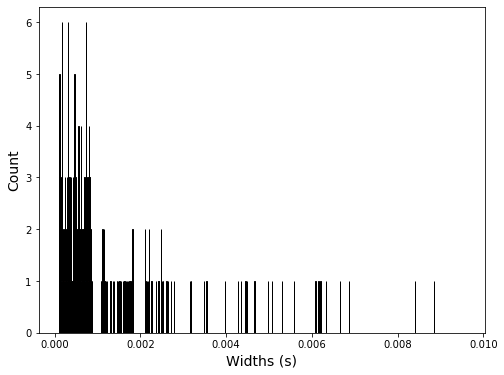

In [44]:
print(widths.shape)
print(widths)
plt.figure(figsize = (8,6))
plt.hist(widths, bins=10, histtype='bar', linewidth=1, edgecolor='k')
plt.xlabel("Widths (s)", fontsize=14)
plt.ylabel("Count", fontsize = 14)
plt.show()

In [45]:
##### Counting bursts with sub-pulse < 100 us #####
count = 0
for i in range(len(widths)):
    print(events[i], "\t", widths[i])
    idx = np.where(widths[i]<0.0001)
    if len(idx[0]) > 0:
        print("This burst has 100 us sub-pulse")
        count = count+1
    print("\n")
print(count)

29641002 	 [0.00016065 0.0006974  0.00677779 0.00448701]


41252817 	 [2.26813378e-05]
This burst has 100 us sub-pulse


40594289 	 [2.07998707e-04 2.45997385e-04 4.40465934e-04 1.35975888e-03
 6.99250492e-05 6.45845307e-04]
This burst has 100 us sub-pulse


32158184 	 [0.00039215 0.00030113]


34024464 	 [0.0013672]


24342210 	 [0.00027156]


26690059 	 [0.00043097 0.0003142  0.00052507]


42630260 	 [0.00036329]


38536189 	 [6.90423034e-05 1.26108591e-04]
This burst has 100 us sub-pulse


40750656 	 [0.00491895 0.00104936 0.0014604 ]


38552211 	 [0.00115547 0.00966288 0.0002164 ]


41965143 	 [7.20658395e-05]
This burst has 100 us sub-pulse


27687783 	 [0.00051397 0.00040701 0.00014389 0.00044564 0.0003095  0.00031559]


32407381 	 [6.17797574e-05 1.63775691e-03 1.97399511e-04 2.38362207e-03
 2.64157382e-03]
This burst has 100 us sub-pulse


24512726 	 [8.15542031e-05 2.69327172e-04 1.67928820e-03 2.73671329e-03]
This burst has 100 us sub-pulse


23463808 	 [0.00020088 0.00236346

In [14]:
111/140

0.7928571428571428